The dataset is formatted in a way where each row has  comment_ID, Author, Date, and content followed by class. Class is labeled as '1' for spam and '0' for not spam

In [367]:
'''Con at all the dataset and load the dataset using pandas and show some sample data'''

import pandas as pd 
import numpy as np
import glob

path = 'YouTube-Spam-Collection-v1'
allFiles = glob.glob(path + '/*.csv')

print("List of all the files: \n", allFiles)

list =[]
for files_ in allFiles:
    df = pd.read_csv(files_)
    list.append(df)

data = pd.concat(list)    
#data = pd.read_csv('YouTube-Spam-Collection-v1/Youtube01-Psy.csv')

print("\n\nSample of our data")
data.tail()
#data.to_csv('test.csv', encoding='utf-8')


List of all the files: 
 ['YouTube-Spam-Collection-v1/Youtube03-LMFAO.csv', 'YouTube-Spam-Collection-v1/Youtube04-Eminem.csv', 'YouTube-Spam-Collection-v1/Youtube05-Shakira.csv', 'YouTube-Spam-Collection-v1/Youtube02-KatyPerry.csv', 'YouTube-Spam-Collection-v1/Youtube01-Psy.csv']


Sample of our data


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1
349,z13vhvu54u3ewpp5h04ccb4zuoardrmjlyk0k,Ray Benich,2015-06-05T18:05:16,The first billion viewed this because they tho...,0


In [368]:
print("Total number of rows in the dataset: ", len(data))
print("No of content which are classified as spam: ", len(data[data['CLASS'] == 1]))
print("No of content which are classified as not spam: ", len(data[data['CLASS'] == 0]))

Total number of rows in the dataset:  1956
No of content which are classified as spam:  1005
No of content which are classified as not spam:  951


### Bag of Words

#### Data Preprocessing

We will begin data preprocessing by implementing CountVectorizer() method that entailed cleaning our data first. This cleaning involved converting all of our data to lower case and removing all punctuation marks. CountVectorizer() has certain parameter that takes care of processing for e.g. converting to lowercase, ignoting punctuations, etc.

* `lowercase = True`
    
    The `lowercase` parameter has a default value of `True` which converts all of our text to its lower case form.


* `token_pattern = (?u)\\b\\w\\w+\\b`
    
    The `token_pattern` parameter has a default regular expression value of `(?u)\\b\\w\\w+\\b` which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.


* `stop_words`

    The `stop_words` parameter is set to `english` which will remove all words from our document set that match a list of English stop words which is defined in scikit-learn. 

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(stop_words = 'english')

In [96]:
count_vector

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [386]:
# Let's convert the dataset to array after tranforming the dataset to see how the data look like

doc_array = count_vector.transform(data['CONTENT']).toarray()
#doc_array
frequency_matrix = pd.DataFrame(doc_array, 
                                columns = count_vector.get_feature_names())

frequency_matrix.tail()
#frequency_matrix.iloc[1900:, 4013:]
#frequency_matrix.to_csv('example.csv')

,00,000,002,018,02,034,04,047000,05,053012,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
1951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Testing and Training our dataset

Split the dataset into a training and testing set by using the train_test_split method in sklearn. Split the data
using the following variables:
* `X_train` is our training data for the 'CONTENT' column.
* `y_train` is our training data for the 'CLASS' column
* `X_test` is our testing data for the 'CONTENT' column.
* `y_test` is our testing data for the 'CLASS' column
Print out the number of rows we have in each our training and testing data.

In [100]:
# split into training and testing sets

from sklearn.model_selection import train_test_split

X = data['CONTENT']
y = data['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, random_state = 1,
                                                   )

print("No of rows in the total dataset: {}".format(len(data)))
print("No of rows in the training dataset: {}".format(len(X_train)))
print("No of rows in the testing dataset: {}".format(len(X_test)))

No of rows in the total dataset: 1956
No of rows in the training dataset: 1564
No of rows in the testing dataset: 392


#### Applying BoW processing to our dataset

We have split the dataset into training and testing set. We will perform the following 2 steps:

* Firstly, we will fit and transform our training set (`X_train`) using `CountVectorizer()` to a matrix form.
* Secondly, we will transform our test set (`X_test`) that will return a matrix

Note that `X_train` is our training set for the `CONTENT` column from the dataset and `X_test` is our testing set for the `CONTENT` column from the datset that we will be using later for prediction.

In [98]:
# Initialize CountVectorizer.
count_vector = CountVectorizer(stop_words = 'english')

# Fit and transform the training set and store the result in training_data. 
training_data = count_vector.fit_transform(X_train)

# Tranform (no fit) the testing data and store in testing_data.
testing_data = count_vector.transform(X_test)

In [365]:
# Let's begin with just training the model with RandomForestClassifier. We will use hyperparameter and different model 
# at a later stage to identify the best model.

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(training_data, y_train)
#X_test_predict = clf.predict(X_test)

print("Accuracy Score = {0:.2f}%".format(clf.score(testing_data, y_test) * 100)) # clf.score performs predict(X) by default


Accuracy Score = 93.11%


#### Since the accuracy is based on just one split (using train_test_split), we need to be sure that the accuracy is high across multiple splits, so we will use cross_val_score with 10 different splits. 

#### Since cross_val_Score takes the entire dataset i.e. X and y values directly (not after splitting as corss_val_score takes care of splitting the data) , we will have to perform fit_tranform on X using CountVectorizer.

In [364]:
# Fit and transform the X and store the result in X_training_data. 
X_full_data = count_vector.fit_transform(X)

from sklearn.model_selection import cross_val_score

predict_score = cross_val_score(clf, X_full_data, y, cv = 10)

# show average score +/- two standard deviations. 
print("Mean accuracy score: %0.2f%s (+/- %0.2f)" %(predict_score.mean() * 100, "%", predict_score.std() * 2))

Mean accuracy score: 93.30% (+/- 0.05)


#### Let's train different models on our dataset and pick the best one for grid search paramaterization.

* DeciisionTreeClassifer
* Multinomial Naive Bayes
* Support Vector Machine
* AdaBoost
* RandomForest Classifier
* Neural Network

In [253]:
# Define a function that will take parameter as Learner, training, and testing dataset to print accuracy 
# using cross_val_score for each model

def train_predict(learner, training_data, y):
    '''
    learner: the learning algorithm to be trained
    training_data: the data trnsformed using fit_tranform from CountVectorizer
    y: the classification label
    '''

    cv = 10
    learner = learner
    
    scores = cross_val_score(learner, training_data, y, cv = cv, scoring = "accuracy")
    
    print("Model's mean accuracy using %s is: %0.2f%s (+/- %0.2f)" %(learner.__class__.__name__, scores.mean() * 100, "%", scores.std() * 2))
    
    return (scores.mean())
    


In [319]:
# Let's initialize different model learning algorithm and evaluate their mean accuracy score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

clf_A = RandomForestClassifier(random_state = 42)
clf_B = DecisionTreeClassifier(random_state = 43)
clf_C = SVC(random_state = 44)
clf_D = AdaBoostClassifier(random_state = 45)
clf_E = MultinomialNB()
clf_F = MLPClassifier(random_state = 46)

#col_name = [clf_A.__class__.__name__, clf_B.__class__.__name__, clf_C.__class__.__name__, clf_D.__class__.__name__, 
#           clf_E.__class__.__name__, clf_F.__class__.__name__]
results = []
for i, clf in enumerate([clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]):
    results.append(train_predict(clf, X_full_data, y))


Model's mean accuracy using RandomForestClassifier is: 93.66% (+/- 0.05)
Model's mean accuracy using DecisionTreeClassifier is: 94.37% (+/- 0.04)
Model's mean accuracy using SVC is: 51.38% (+/- 0.00)
Model's mean accuracy using AdaBoostClassifier is: 93.81% (+/- 0.05)
Model's mean accuracy using MultinomialNB is: 90.59% (+/- 0.06)
Model's mean accuracy using MLPClassifier is: 93.96% (+/- 0.03)


Accuracy Scores are as follow: 

RandomForestClassifier : 93.66 %
DecisionTreeClassifier : 94.37 %
SVC : 51.38 %
AdaBoostClassifier : 93.81 %
MultinomialNB : 90.59 %
MLPClassifier : 93.96 %


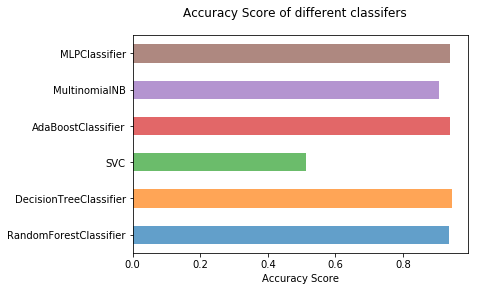

In [330]:
# Let's plot the accuracy score for all the classifiers above.
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
col_name = [clf_A.__class__.__name__, clf_B.__class__.__name__, clf_C.__class__.__name__, clf_D.__class__.__name__, 
           clf_E.__class__.__name__, clf_F.__class__.__name__]
data = pd.Series(results, index = col_name)

plt.xlabel('Accuracy Score')
plt.suptitle('Accuracy Score of different classifers')
data.plot(kind = 'barh', alpha = 0.7)

print("Accuracy Scores are as follow: \n")
for i in range(len(results)):
    print(col_name[i],":", np.round(results[i] * 100, 2), "%")

### Validate the Model

#### Validation Curve Plot

Since DecisionTreeClassifier gives the best accuracy we will use DecisionTreeClassifier for validation. To validate whether the model is underfitting / just right / overfitting the data we will plot validation curve for DecisionTreeClassifier by varying `max_depth` parameter. We can see that both the training score as well validation score keeps increasing with the increase in our parameter suggesting that the model is neither underfit nor overfit.

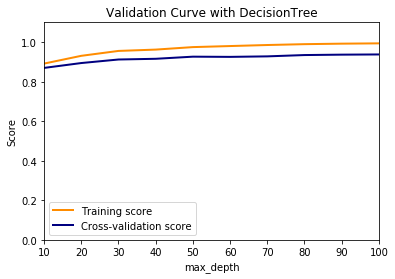

In [312]:
from sklearn.model_selection import validation_curve
#param_range = np.logspace(-7, 3, 3)
param_range = np.linspace(10, 100, num=10)
train_scores, test_scores = validation_curve(clf_A, X_full_data, y, "max_depth", param_range=param_range,
                                             cv=10, scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with DecisionTree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.xlim(param_range[0], param_range[len(param_range)-1])
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
#plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                 train_scores_mean + train_scores_std, alpha=0.2,
#                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
#plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                 test_scores_mean + test_scores_std, alpha=0.2,
#                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#### Learning Curve

We will also plot the learning curve score to see the impact of changing the training dataset on the training score and cross validation score. We can see that with the increase in training data size both training score and validation score keeps increasing. This suggests that our model would have benefitted more by increasing the dataset.

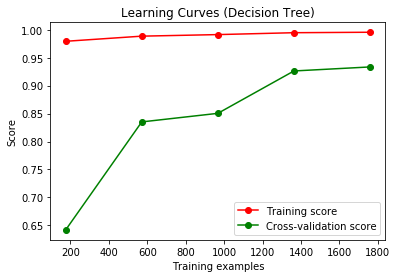

In [404]:
#plt.figure()
plt.title("Learning Curves (Decision Tree)")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(clf_A, X_full_data, y, cv=10, 
                                                        n_jobs=1, train_sizes=np.linspace(0.1, 1.0,5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [262]:
print(clf_B)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=43,
            splitter='best')


In [395]:
# Since DecisionTreeClassifier gives the best accuracy, we will use it in gridsearch for parameterization. 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

parameters = {'max_depth': [10, 20, 30, 50, 70, None], 'min_samples_leaf': [1, 5, 10, 15]}
scorer = make_scorer(accuracy_score)

# clf_grid = [clf_A, clf_B]
grid_obj = GridSearchCV(clf_B, param_grid = parameters, scoring = scorer)
grid_fit = grid_obj.fit(X_full_data, y)


scores = cross_val_score(grid_obj.best_estimator_, X_full_data, y, cv = 10, scoring = "accuracy")

print("Model's mean accuracy using %s is: %0.2f%s (+/- %0.2f)" %(grid_obj.best_estimator_.__class__.__name__, scores.mean() * 100, "%", scores.std() * 2))

Model's mean accuracy using DecisionTreeClassifier is: 93.81% (+/- 0.04)


In [396]:
print(grid_obj.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=43,
            splitter='best')


#### Refine the model:

Let say that if we start getting new comments we will have to run the comment through CountVecotrizer followed by the classifier (in the case above DecisionTreeClassifier). Therefore we will combine both the steps to avoid missing any information while modeling. This can be done by using a feature provided by scikit-learn called a `Pipeline` .

Some of the benefits for using Pipeline are:
##### Convenience and encapsulation
We only have to call `fit` and `predict` once on the data to fit a whole sequence of estimators.
##### Joint parameter selection
We can grid search over parameters of all estimators in the pipeline at once.
##### Safety
Pipelines help avoid leaking statistics from the test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.


In [243]:
# Let's set up a Pipeline
from sklearn.pipeline import Pipeline

pipeline_estimators = [
    ('count_vector', CountVectorizer()),
    ('clf', DecisionTreeClassifier()) ]

pipe = Pipeline(pipeline_estimators)

# print the pipe to looks at the parameters used in each pipeline_estimators
print(pipe)
print(pipe.named_steps['clf'])

Pipeline(memory=None,
     steps=[('count_vector', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
     ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [244]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.951530612244898

#### Since the above accuracy is again based on just one split we will test the moel across many splits using cross_val_score

In [245]:
scores_pipe = cross_val_score(pipe, X, y, cv = 10)

print("Model's mean accuracy using %s is: %0.2f%s (+/- %0.2f)" %(pipe.named_steps['clf'].__class__.__name__, scores_pipe.mean() * 100, "%", scores_pipe.std() * 2))

Model's mean accuracy using DecisionTreeClassifier is: 93.86% (+/- 0.04)


#### Let's make another pipeline which includes TF-IDF transformer. 

The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of terms that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

In [246]:
# to use tf-idf we will have to import TfidfTransformer from sklearn

from sklearn.feature_extraction.text import TfidfTransformer
pipeline_estimators_new = [
    ('count_vector', CountVectorizer()),
    ('tf-idf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier()) ]

pipe_new = Pipeline(pipeline_estimators_new)

# print the pipe to looks at the parameters used in each pipeline_estimators
print(pipe_new)
print(pipe_new.named_steps['tf-idf'])
print(pipe_new.named_steps['clf'])

Pipeline(memory=None,
     steps=[('count_vector', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
     ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [247]:
scores_pipe_new = cross_val_score(pipe_new, X, y, cv = 10)

print("Model's mean accuracy using %s is: %0.2f%s (+/- %0.2f)" %(pipe_new.named_steps['clf'].__class__.__name__, scores_pipe_new.mean() * 100, "%", scores_pipe_new.std() * 2))

Model's mean accuracy using DecisionTreeClassifier is: 93.76% (+/- 0.04)


#### Doesn't look like that adding tf-idf will improve the performance. Hence we will use the former pipeline (`pipe`)

Let's also perform a grid search on the former pipeline to find the best parameters to be used for CounterVectorizer and DecisionTreeClassifier

In [248]:
parameter_pipe ={
    'count_vector__ngram_range': ((1,1), (1,2), (1,3)), # unigram, bigram, or trigram
    'count_vector__stop_words': ('english', None),
    'count_vector__max_features': (None, 1000, 2000, 3000),
    'clf__max_depth': (10, 20, 30, 50, 70, None), 
    'clf__min_samples_leaf': (1, 5, 10, 15)
}

grid_search_pipe = GridSearchCV(estimator = pipe, param_grid = parameter_pipe, scoring = 'accuracy')

grid_search_pipe.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('count_vector', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
     ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'count_vector__ngram_range': ((1, 1), (1, 2), (1, 3)), 'count_vector__stop_words': ('english', None), 'count_vector__max_features': (None, 1000, 2000, 3000), 'clf__max_depth': (10, 20, 30, 50, 70, None), 'clf__min_samples_leaf': (1, 5, 10, 15)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [338]:
scores = cross_val_score(grid_search_pipe.best_estimator_, X, y, cv = 30, scoring = "accuracy")

print("Model's mean accuracy using %s is: %0.2f%s (+/- %0.2f)" %(grid_search_pipe.best_estimator_.__class__.__name__, scores.mean() * 100, "%", scores.std() * 2))

Model's mean accuracy using Pipeline is: 94.45% (+/- 0.07)


In [250]:
grid_search_pipe.best_estimator_

Pipeline(memory=None,
     steps=[('count_vector', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
     ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

#### Conclusion

I began by cleaning the data and preprocessing it by using CountVectoriser method to format our data into numbers so our machine learning algorithm can learn from the formatted data well. 

I have worked through a number of classifiers for e.g. NaivesBayes, RandomForest, DecisionTree, Neural Network, SVC, AdaBoost to identify which classifier works the best given the problem. Clearly, the accuracy score by DecisionTree proved to be greater than other classifier and hence making DecisionTree Classifier as our choice of model. 

I have used GridSearch for hyperparameterization to understand what best combination of various parameters provided by DecisionTree can used to increase our accuracy.

Later, I plotted the validation curve to understand if our model is a good fit / under fitting / over fitting our data. We saw that the training and cross validation scores were appropriately high throughout the different parameter values.

Finally, I have improved (or upgraded) our model by introducing `pipeline`. Without `pipeline` for any new dataset we will have to run it through CountVectorizer and then run through our classifier. During this process we might have missed critical steps. Therefore with the usage of `pipeline` I made sure that the dataset is passed through all the sequences (i.e. CountVectorizer, Classifier, GridSearch) while maintaining the same training and testing dataset.

By following all the above steps I was able to create a model that was able to identify whether a comment on a youtube video is a spam or not with approximately an excellent score of 95% accuracy.